# The Machine Learning process

`INPUT VARIABLES`: numerical and
categorical <br>
`OUPUT VARIABLE`: numeric <br>

__GOAL__: Develop a regression model that accurately predicts car prices.

`carID` : An attribute that contains an identifier for each car. <br>
`Brand` : The car’s main brand (e.g. Ford, Toyota). <br>
`model` : The car model. <br>
`year`: The year of Registration of the Car. <br>
`price (Output)` : The car’s price when purchased by Cars 4 You (in £). <br>
`transmission` : The kind of transmission (Manual, Semi-auto, Auto). <br>
`mileage`: The total reported distance travelled by the car (in miles). <br>
`fuelType`: Type of Fuel used by the car (Diesel, Petrol, Hybrid, Electric). <br>
`tax`: The amount of road tax (in £) that, in 2020, was applicable to the car in question. <br>
`mpg`: Average Miles per Gallon. <br>
`engineSize`: Size of Engine in liters (Cubic Decimeters). <br>
`paintQuality%`: The mechanic’s assessment of the cars’ overall paint quality and hull integrity (filled by the mechanic during evaluation). <br>
`previousOwners`: Number of previous registered owners of the vehicle. <br>
`hasDamage`: Boolean marker filled by the seller at the time of registration stating whether the car is damaged or not. <br>

# 1. Import the needed libraries

In [1]:
#general imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

sns.set()

# data partition
from sklearn.model_selection import train_test_split

#filter methods
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)

# 2. Import data

In [2]:
cars_truth = pd.read_csv('project_data/train.csv', sep=',')
cars_2classify = pd.read_csv('project_data/test.csv', sep=',')

# 3. Explore the data

In [3]:
cars_truth.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


To note:
- Transmission: has anual instead of Manual --> check for mistakes
- Previous owners: has negative values

In [4]:
cars_truth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


To note:
- Year: should be integer
- Previous owners: should be integer
- Has damage: should/can be boolean

In [5]:
cars_truth.describe().round(2)

,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,75973.000000,74482.000000,75973.000000,74510.000000,68069.000000,68047.000000,74457.000000,74449.000000,74423.000000,74425.0
mean,37986.000000,2017.096611,16881.889553,23004.184088,120.329078,55.152666,1.660136,64.590667,1.994580,0.0
std,21931.660338,2.208704,9736.926322,22129.788366,65.521176,16.497837,0.573462,21.021065,1.472981,0.0
min,0.000000,1970.000000,450.000000,-58540.574478,-91.121630,-43.421768,-0.103493,1.638913,-2.345650,0.0
25%,18993.000000,2016.000000,10200.000000,7423.250000,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,37986.000000,2017.000000,14699.000000,17300.000000,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,56979.000000,2019.000000,20950.000000,32427.500000,145.000000,62.800000,2.000000,82.000000,3.000000,0.0
max,75972.000000,2024.121759,159999.000000,323000.000000,580.000000,470.800000,6.600000,125.594308,6.258371,0.0


To note:
- Year: from 1970 to 2024
- Mileage: has negative values
- Tax: has negative values
- Mpg: has negative values
- Engine size: has negative values
- Pain quality: has percentage bigger than 100
- Previous owners: has negative values
- Has damage: is always 0. No car has damage?

In [6]:
cars_truth.describe(include='object')

,Brand,model,transmission,fuelType
count,74452,74456,74451,74462
unique,72,735,40,34
top,Ford,Focus,Manual,Petrol
freq,14808,6353,38050,37995


To note:
- Transmission: should only have 3/4 unique values
- Fuel type: should only have 4/5 unique values

In [7]:
cars_truth.drop(columns = ['price', 'Brand', 'model', 'transmission', 'fuelType', 'hasDamage']).corr(method = 'spearman')

,carID,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners
carID,1.000000,0.014193,-0.024214,-0.038504,-0.009712,-0.176081,-0.006651,-0.000236
year,0.014193,1.000000,-0.780597,0.317446,-0.313547,-0.037248,0.004975,0.001191
mileage,-0.024214,-0.780597,1.000000,-0.254982,0.322574,0.098192,-0.001336,0.004020
tax,-0.038504,0.317446,-0.254982,1.000000,-0.551523,0.160515,0.004366,-0.000583
mpg,-0.009712,-0.313547,0.322574,-0.551523,1.000000,-0.201771,0.001541,0.001453
engineSize,-0.176081,-0.037248,0.098192,0.160515,-0.201771,1.000000,0.003838,0.003925
paintQuality%,-0.006651,0.004975,-0.001336,0.004366,0.001541,0.003838,1.000000,-0.005642
previousOwners,-0.000236,0.001191,0.004020,-0.000583,0.001453,0.003925,-0.005642,1.000000


To note:
- The linear correlation between mileage and year is strangely high.

In [8]:
cars_truth.replace('', np.nan, inplace=True)

cars_truth.isna().sum()

carID                0
Brand             1521
model             1517
year              1491
price                0
transmission      1522
mileage           1463
fuelType          1511
tax               7904
mpg               7926
engineSize        1516
paintQuality%     1524
previousOwners    1550
hasDamage         1548
dtype: int64

To note:
- There are a lot of missing values.

# 4. Modify the data

Before data separation:
- Change index

After data separation:
- Fix missing values.
- Change data types: (only when there are no missing values)
    - year and previousOwners: should be integer
    - Has damage: should/can be boolean
- Remove outliers.
- Fix mistakes: (only when there are no outliers)
    - previousOwners, mileage, mpg, engineSize, tax: has negative values 
    - painQuality%: has percentage bigger than 100
    - hasDamage: is always 0. No car has damage?
    - Transmission: should only have 3/4 unique values
    - Fuel type: should only have 4/5 unique values
- Feature engineering.

## 4.1. Indexing:

In [9]:
len(cars_truth) == len(cars_truth.carID.unique())           #check ID's are unique

True

In [10]:
cars_truth.set_index('carID', inplace = True)

## 4.2. Separate data:

In [11]:
independent_columns = cars_truth.columns.drop('price')
X = cars_truth.loc[:, list(independent_columns)]
y = cars_truth.loc[:,'price']

In [12]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size = 0.7, shuffle = True)

## 4.3. Missing values:

In [13]:
categorical_columns = ['Brand', 'model', 'transmission', 'fuelType']
numeric_columns = list(independent_columns.drop(categorical_columns))

In [14]:
for column in categorical_columns:
    X_train[column] = X_train[column].fillna('Unknown')
    X_validation[column] = X_validation[column].fillna('Unknown')

In [15]:
X_train.isna().sum()

Brand                0
model                0
year              1053
transmission         0
mileage           1008
fuelType             0
tax               5575
mpg               5580
engineSize        1074
paintQuality%     1059
previousOwners    1072
hasDamage         1071
dtype: int64

We need to fix: year, mileage, tax, mpg, engineSize, paintQuality%, previousOwners, hasDamage

In [16]:
means = X_train[numeric_columns].mean()
medians = X_train[numeric_columns].median()

### 4.3.1. Year

In [17]:
year = X_train.year
mean_year = means.year
median_year = medians.year

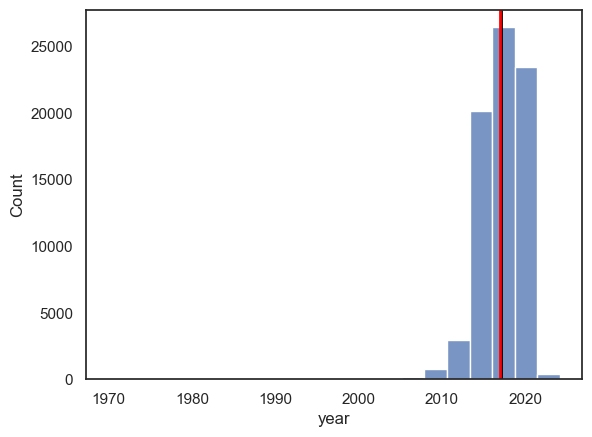

In [18]:
sns.set_theme(style="white")

fig, ax = plt.subplots()

sns.histplot(cars_truth.year, bins=20)

ax.axvline(mean_year, color='black', linewidth=2)
ax.axvline(median_year, color='red', linewidth=2)

plt.show()

sns.set()

In [19]:
print(f'Mean: {mean_year} \nMedian: {median_year}')

Mean: 2017.101599560216 
Median: 2017.0


Since they're (almost) the same:

In [20]:
X_train.year = X_train.year.fillna(round(mean_year))

And,

In [21]:
X_validation.year = X_validation.year.fillna(round(mean_year))

### 4.3.2. Mileage

In [22]:
mileage = X_train.mileage
mean_mileage = means.mileage
median_mileage = medians.mileage

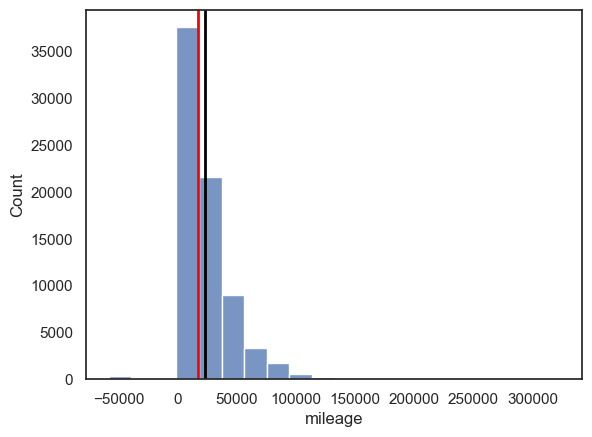

In [23]:
sns.set_theme(style="white")

fig, ax = plt.subplots()

sns.histplot(cars_truth.mileage, bins=20)

ax.axvline(mean_mileage, color='black', linewidth=2)
ax.axvline(median_mileage, color='red', linewidth=2)

plt.show()

sns.set()

In [24]:
print(f'Mean: {mean_mileage} \nMedian: {median_mileage}')

Mean: 22976.172233201018 
Median: 17243.0


Let's change into the median: ??????????????????????????????????????????????????????????????????????????????????????????????????

In [25]:
X_train.mileage = X_train.mileage.fillna(round(median_mileage))

And,

In [26]:
X_validation.mileage = X_validation.mileage.fillna(round(median_mileage))

### 4.3.3. Tax

In [27]:
tax = X_train.tax
mean_tax = means.tax
median_tax = medians.tax

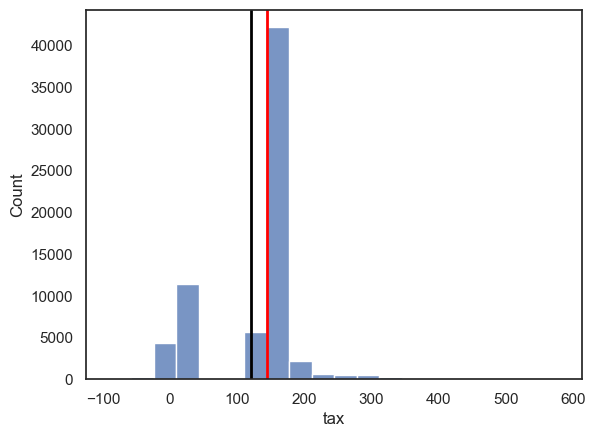

In [28]:
sns.set_theme(style="white")

fig, ax = plt.subplots()

sns.histplot(cars_truth.tax, bins=20)

ax.axvline(mean_tax, color='black', linewidth=2)
ax.axvline(median_tax, color='red', linewidth=2)

plt.show()

sns.set()

In [29]:
print(f'Mean: {mean_tax} \nMedian: {median_tax}')

Mean: 120.45398591463848 
Median: 145.0


Let's change into the median: ??????????????????????????????????????????????????????????????????????????????????????????????????

In [30]:
X_train.tax = X_train.tax.fillna(round(median_tax))

And,

In [31]:
X_validation.tax = X_validation.tax.fillna(round(median_tax))

### 4.3.4. Mpg

In [32]:
mpg = X_train.mpg
mean_mpg = means.mpg
median_mpg = medians.mpg

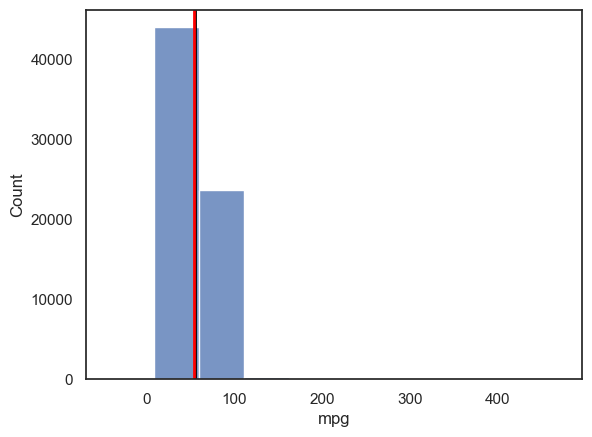

In [43]:
sns.set_theme(style="white")

fig, ax = plt.subplots()

sns.histplot(cars_truth.mpg, bins=10)

ax.axvline(mean_mpg, color='black', linewidth=2)
ax.axvline(median_mpg, color='red', linewidth=2)

plt.show()

sns.set()

In [34]:
print(f'Mean: {mean_mpg} \nMedian: {median_mpg}')

Mean: 55.2011882739076 
Median: 54.3


Since they're (almost) the same:

In [35]:
X_train.mpg = X_train.mpg.fillna(round(mean_mpg))

And,

In [38]:
X_validation.mpg = X_validation.mpg.fillna(round(mean_mpg))

### 4.3.5. Engine size

In [39]:
engineSize = X_train.engineSize
mean_engineSize = means.engineSize
median_engineSize = medians.engineSize

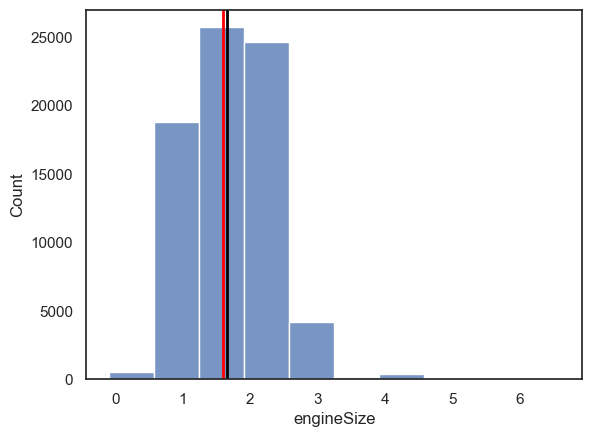

In [40]:
sns.set_theme(style="white")

fig, ax = plt.subplots()

sns.histplot(cars_truth.engineSize, bins=10)

ax.axvline(mean_engineSize, color='black', linewidth=2)
ax.axvline(median_engineSize, color='red', linewidth=2)

plt.show()

sns.set()

In [41]:
print(f'Mean: {mean_engineSize} \nMedian: {median_engineSize}')

Mean: 1.6591737094202115 
Median: 1.6


Since they're (almost) the same:

In [44]:
X_train.engineSize = X_train.engineSize.fillna(round(median_engineSize))

And,

In [46]:
X_validation.engineSize = X_validation.engineSize.fillna(round(median_engineSize))

### 4.3.6. Paint quality

In [48]:
paintQuality = X_train['paintQuality%']
mean_paintQuality = means['paintQuality%']
median_paintQuality = medians['paintQuality%']

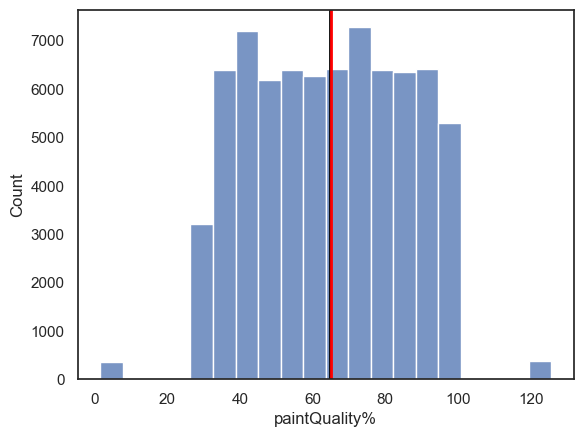

In [50]:
sns.set_theme(style="white")

fig, ax = plt.subplots()

sns.histplot(cars_truth['paintQuality%'], bins=20)

ax.axvline(mean_paintQuality, color='black', linewidth=2)
ax.axvline(median_paintQuality, color='red', linewidth=2)

plt.show()

sns.set()

In [51]:
print(f'Mean: {mean_paintQuality} \nMedian: {median_paintQuality}')

Mean: 64.67506463457173 
Median: 65.0


Since they're (almost) the same:

In [52]:
X_train['paintQuality%'] = X_train['paintQuality%'].fillna(round(median_paintQuality))

And,

In [54]:
X_validation['paintQuality%'] = X_validation['paintQuality%'].fillna(round(median_paintQuality))

### 4.3.7. Previous owners

In [55]:
previousOwners = X_train.previousOwners
mean_previousOwners = means.previousOwners
median_previousOwners = medians.previousOwners

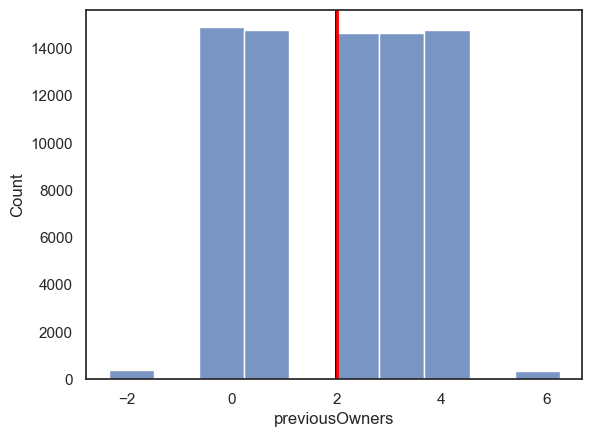

In [56]:
sns.set_theme(style="white")

fig, ax = plt.subplots()

sns.histplot(cars_truth.previousOwners, bins=10)

ax.axvline(mean_previousOwners, color='black', linewidth=2)
ax.axvline(median_previousOwners, color='red', linewidth=2)

plt.show()

sns.set()

In [57]:
print(f'Mean: {mean_previousOwners} \nMedian: {median_previousOwners}')

Mean: 1.9968421682065058 
Median: 2.0


Since they're (almost) the same:

In [58]:
X_train.previousOwners = X_train.previousOwners.fillna(round(median_previousOwners))

And,

In [62]:
X_validation.previousOwners = X_validation.previousOwners.fillna(round(median_previousOwners))

### <span style='color: red;'>4.3.8. Has damage</span> 

Don't know how to do this one, because it's always 0. Should we assume that when it doesn't say it's 0 or 1 <span style='color: red;'>?????????????????????????????????????????</span>

### 4.3.9. Confirmation

In [66]:
X_train.isna().sum()

Brand                0
model                0
year                 0
transmission         0
mileage              0
fuelType             0
tax                  0
mpg                  0
engineSize           0
paintQuality%        0
previousOwners       0
hasDamage         1071
dtype: int64

## 4.4. Dtypes:

### 4.4.1 Year

Let's change de data type of year by rounding the given values.

In [68]:
X_train.year = X_train.year.astype(int)

In [71]:
X_validation.year = X_validation.year.astype(int)

### 4.4.2 Previous owners

Let's change de data type of previousOwners by rounding the given values.

In [73]:
X_train.previousOwners = X_train.previousOwners.astype(int)

In [74]:
X_validation.previousOwners = X_validation.previousOwners.astype(int)

### 4.4.3 Has damage

Let's change de data type of hasDamage to a boolean.

In [77]:
X_train.hasDamage = X_train.hasDamage.astype(bool)

In [81]:
X_validation.hasDamage = X_validation.hasDamage.astype(bool)

### 4.4.4 Confirmation

In [82]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53181 entries, 46299 to 49075
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           53181 non-null  object 
 1   model           53181 non-null  object 
 2   year            53181 non-null  int32  
 3   transmission    53181 non-null  object 
 4   mileage         53181 non-null  float64
 5   fuelType        53181 non-null  object 
 6   tax             53181 non-null  float64
 7   mpg             53181 non-null  float64
 8   engineSize      53181 non-null  float64
 9   paintQuality%   53181 non-null  float64
 10  previousOwners  53181 non-null  int32  
 11  hasDamage       53181 non-null  bool   
dtypes: bool(1), float64(5), int32(2), object(4)
memory usage: 4.5+ MB


In [83]:
X_train.head()

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
46299,Mercedes,C Class,2019,Semi-Auto,2575.0,Petrol,145.0,45.6,1.5,60.0,0,False
69620,VW,Polo,2017,Semi-Auto,19324.0,Petrol,20.0,61.4,1.4,71.0,1,False
68925,VW,Polo,2019,Semi-Auto,3329.0,Petrol,145.0,39.8,2.0,85.0,0,False
40663,Mercedes,C Class,2016,Automatic,59290.0,Hybrid,145.0,55.0,2.0,66.0,0,False
25370,Ford,Focus,2020,Manual,100.0,Petrol,145.0,55.0,1.0,80.0,0,False


## 4.5. Outliers:

In [87]:
numeric_columns.remove('hasDamage')
categorical_columns.append('hasDamage')
print(f'All columns: {list(independent_columns)} \nNumerical: {numeric_columns} \nCategorical: {categorical_columns}')

All columns: ['Brand', 'model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'hasDamage'] 
Numerical: ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners'] 
Categorical: ['Brand', 'model', 'transmission', 'fuelType', 'hasDamage']


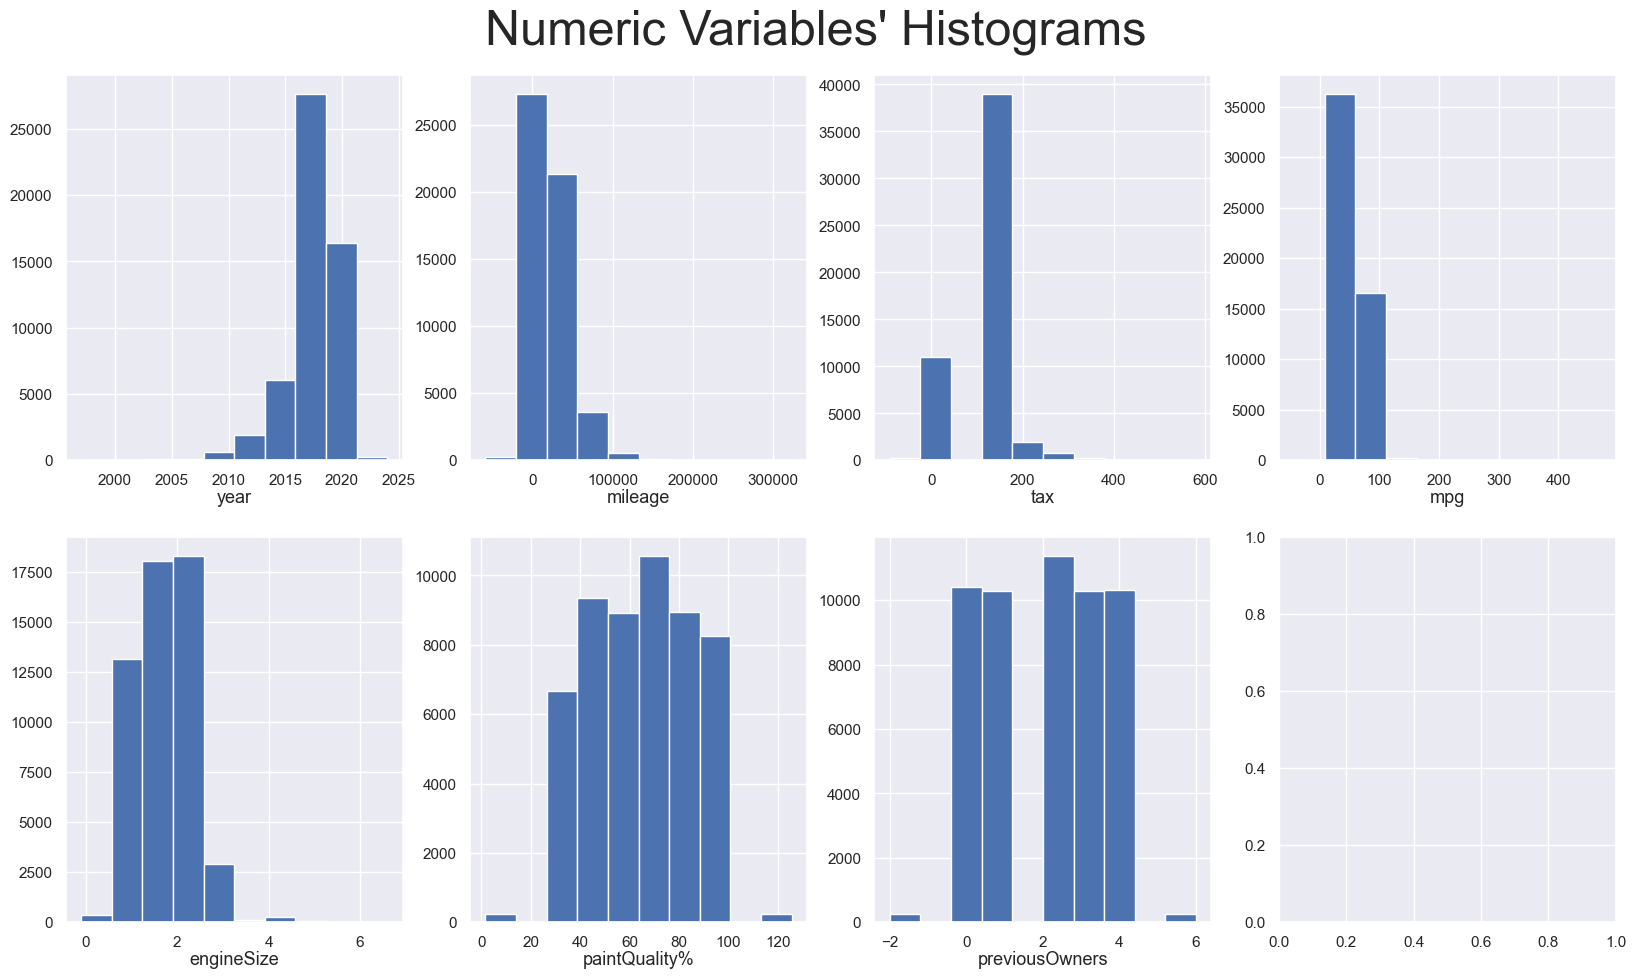

In [123]:
# Plot ALL Numeric Variables' Histograms in one figure
sp_rows = 2
sp_cols = 4

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), numeric_columns):
    ax.hist(X_train[feat])
    ax.set_title(feat, y=-0.13, fontsize=13)
    
# Layout
title = "Numeric Variables' Histograms"
plt.suptitle(title, y=.94, fontsize=35)

plt.show()

sns.set()

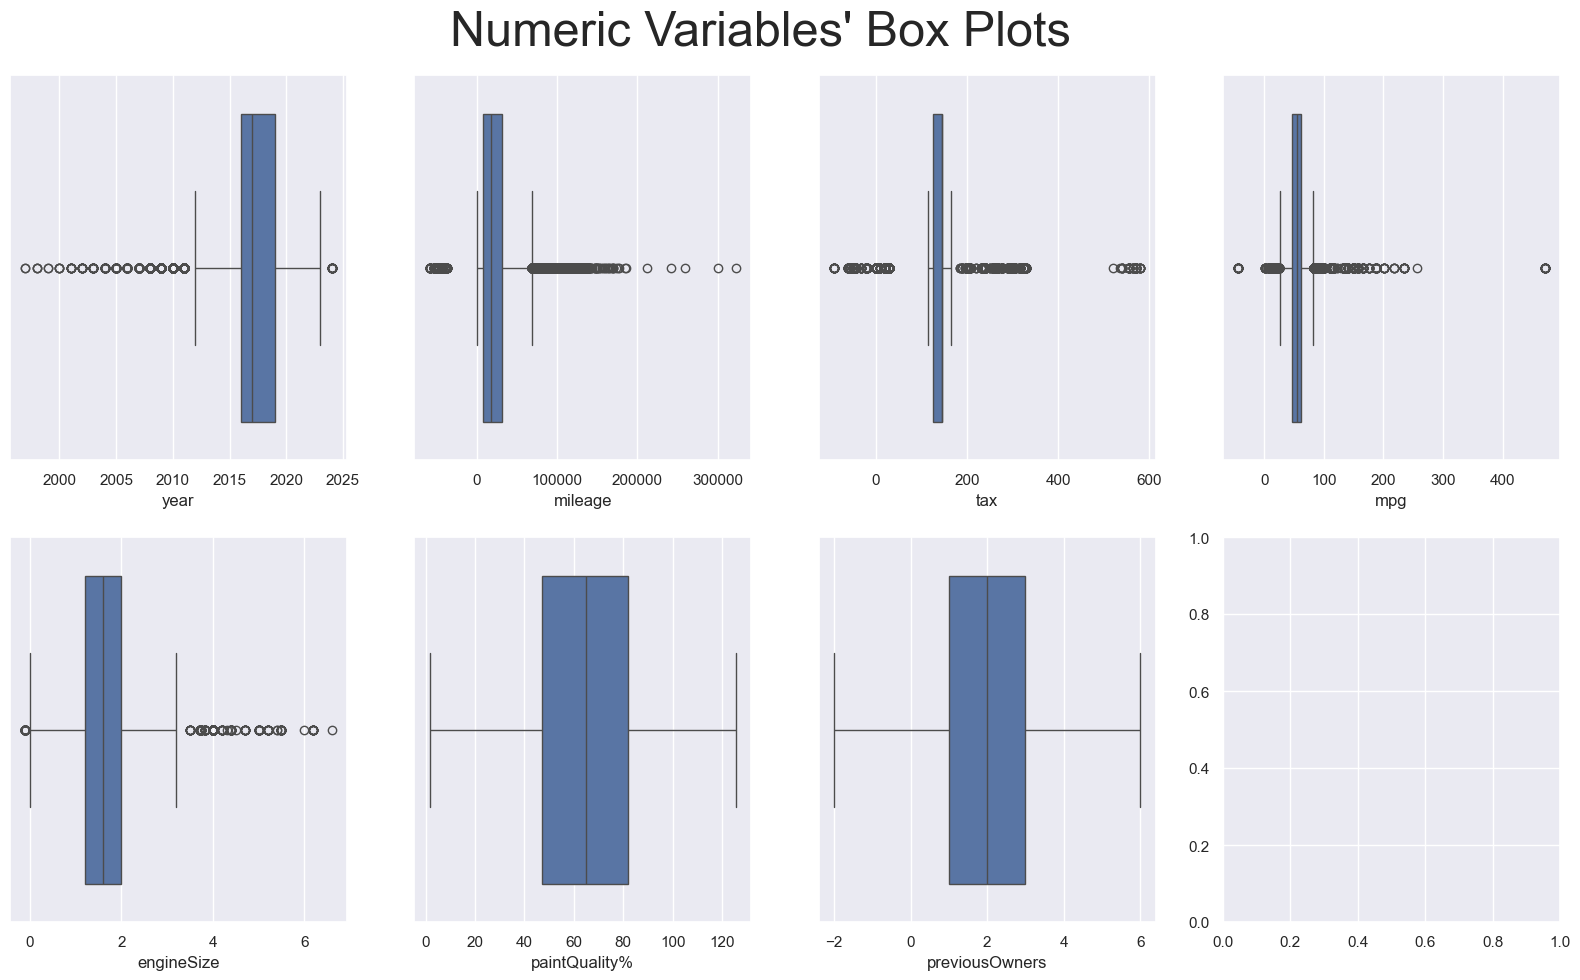

In [134]:
# Plot ALL Numeric Variables' Boxplots in one figure

sp_rows = 2
sp_cols = 4

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each boxplot:
for ax, feat in zip(axes.flatten(), numeric_columns):
    sns.boxplot(x=X_train[feat], ax=ax)
    
# Layout
title = "Numeric Variables' Box Plots"
plt.suptitle(title, y=.94, fontsize=35)

plt.show()

sns.set()

`Year:` has a lot of outliers but they should not be removed

`Mileage, tax, mpg, engine size:` should not be negative AND has a few outliers that we can remove we can remove

`Paint quality:` should not be over 100

`Previous owners:` should not be negative

<span style='color: red;'>Não sei se apagamos tudo (perdemos 4% dos dados) ou se substituimos por positivos (Ex: - 4 passa a 4).</span>

In [117]:
dim = len(cars_truth)

In [116]:
# previousOwners
(len(cars_truth[cars_truth.previousOwners < 0])*100)/dim                          #menos de 1%

0.4883313808853145

In [118]:
# mileage
(len(cars_truth[cars_truth.mileage < 0])*100)/dim                                 #menos de 1%

0.48569886670264434

In [119]:
# mpg
(len(cars_truth[cars_truth.mpg < 0])*100)/dim                                     #menos de 0.1% AND são todos -43.421768

0.047385255288062866

In [120]:
# engineSize
(len(cars_truth[cars_truth.engineSize < 0])*100)/dim                              #menos de 1% AND são todos -0.103493

0.11056559567214669

In [121]:
# tax
(len(cars_truth[cars_truth.tax < 0])*100)/dim                                     #menos de 1%

0.49754518052466007

In [137]:
cars_truth[cars_truth.tax < 0].tax.describe()

count    378.000000
mean     -46.247840
std       18.022758
min      -91.121630
25%      -56.193202
50%      -45.780610
75%      -43.242082
max      -18.330743
Name: tax, dtype: float64

## 4.6. Categorical data:

Check for mistakes, like 'anual' instead of 'Manual':
- Transmission: should only have 3/4 unique values
- Fuel type: should only have 4/5 unique values

## 4.7. Normalize:

## 4.8. Feature engineering:

# 5. Modelling (Create a predictive model)

In [112]:
#dt = DecisionTreeClassifier().fit(X_train, y_train)

In [113]:
#predictions_train = dt.predict(X_train)

In [114]:
#predictions_val = dt.predict(X_validation)

# 6. Assess (Evaluate model)

In [115]:
#dt.score(X_train, y_train)         #should be 1

In [116]:
#dt.score(X_validation, y_validation)

In [117]:
#confusion_matrix(y_train, predictions_train)

In [118]:
#confusion_matrix(y_validation, predictions_val)

# 7. Deploy (Apply to real data)

## 7.1. Do we need to treat the data before using the model???

In [119]:
#cars_2classify

In [120]:
#cars_2classify['price'] = dt.predict(cars_2classify)

In [121]:
#cars_2classify

In [122]:
#cars_2classify['price'].to_csv('project_data/project_predictions.csv')

<div class="alert alert-block alert-success">

<a class="anchor" id="1st-bullet">    </a>
## 1. Importing, Exploration and Pre-processing
    

    
</div>

<a class="anchor" id="4th-bullet">


### 1.3. Data pre-processing, data partition and scaling

</a>

__`Step 6`__ There are missing values in a couple of variables. Fill categories with 'Unknown' and the numericals with the average. <br>
- _Documentation pandas.DataFrame.fillna():_ https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [10]:
#filling with mean
for column in X_train.columns:
    if pd.api.types.is_numeric_dtype(X_train[column]):
        
        #store mean of training data in a variable - in a real application, you may need to store these values for future usages on e.g. test data 
        mean_to_fill = X_train[column].mean()
        
        #fill on X_train
        X_train[column].fillna(mean_to_fill, inplace=True)
        #Fill on X_val
        X_val[column].fillna(mean_to_fill, inplace=True)

__`Step 6`__ Depending on the feature selection technique used, the input variables can differ - some techniques work only with numerical variables while others with categorical data. Define a new object named a `X_train_num` where only the numerical variables are mantained, and a object named as `X_train_cat` with all the categorical independent variables. Do the same for the validation data.
- _Documentation pandas.DataFrame.select_dtypes():_ https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html

In [12]:
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_num.drop('Embarked_Flag', axis = 1, inplace = True)

X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)
X_train_cat['Embarked_Flag'] = X_train['Embarked_Flag']

# Repeat for Validation
#CODE HERE
X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_num.drop('Embarked_Flag', axis = 1, inplace = True)

X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)
X_val_cat['Embarked_Flag'] = X_val['Embarked_Flag']

__`Step 7`__ Normalize the numerical data using the MinMaxScaler from sklearn. By default, this function applies the following formula:

$$X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}},$$

where:
- $X$ is the original feature vector,
- $X_{\\{min}}$ is the smallest value in that feature column, and
- $X_{\\{max}}$ is the largest value in that feature column.


As the end result, the data obtained is scaled between 0 and 1, where 1 refers to the maximum value of the feature while 0 refers to the minimum value of the feature. The function, however, allows you can set other maximum or minimum limits. You can check this (and other parameters in the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [13]:
#imported here for demonstrative purposes but it is a good practice to import everything at the start.
from sklearn.preprocessing import MinMaxScaler

#call function
scaler = MinMaxScaler()

#fit to training data
scaler.fit(X_train_num)

#transform the data
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array

#show results
X_train_num_scaled

array([[0.37170143, 0.01541158, 0.        , ..., 0.        , 0.35      ,
        0.        ],
       [0.01985423, 0.05445717, 0.33333333, ..., 0.5       , 0.6       ,
        0.        ],
       [0.23347575, 0.01541158, 0.        , ..., 0.        , 0.35      ,
        0.        ],
       ...,
       [0.44709726, 0.07831878, 0.        , ..., 0.        , 0.35      ,
        0.        ],
       [0.37170143, 0.04231498, 0.        , ..., 0.2       , 0.5       ,
        0.        ],
       [0.27117366, 0.01756683, 0.        , ..., 0.        , 0.75      ,
        0.        ]])

Convert the array into a pandas df

In [14]:
# Convert the array to a pandas dataframe
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index)
X_train_num_scaled

,Age,Fare,Parch,Pclass,SibSp,Family_Size,Embark_hour,Water_Temp_Celsius
PassengerId,,,,,,,,
224,0.371701,0.015412,0.000000,0.500000,0.000,0.0,0.35,0.0
643,0.019854,0.054457,0.333333,0.500000,0.375,0.5,0.60,0.0
647,0.233476,0.015412,0.000000,0.500000,0.000,0.0,0.35,0.0
32,0.440814,0.285990,0.000000,0.166667,0.125,0.1,0.75,0.0
602,0.371701,0.015412,0.000000,0.500000,0.000,0.0,0.50,0.0
...,...,...,...,...,...,...,...,...
716,0.233476,0.014932,1.000000,0.000000,0.250,0.6,0.00,0.0
492,0.258608,0.014151,0.000000,0.500000,0.000,0.0,0.55,0.0
584,0.447097,0.078319,0.000000,0.166667,0.000,0.0,0.35,0.0


__`Step 7B`__ Using the scaler, scale the numerical validation data also between 0 and 1.

**_Note_**: In the same way you did for filling the missing values, the scaling should **only consider** information gained from the training data. 
In that way, we are going to use the minimum and maximum values of the training dataset for each variable (the MinMaxScaler use those values to scale the data) to scale also the validation dataset.

In [15]:
X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)
X_val_num_scaled.head(3)

,Age,Fare,Parch,Pclass,SibSp,Family_Size,Embark_hour,Water_Temp_Celsius
PassengerId,,,,,,,,
127,0.371701,0.015127,0.000000,0.500000,0.00,0.0,0.90,0.0
619,0.044986,0.076123,0.166667,0.333333,0.25,0.3,0.35,0.0
117,0.880623,0.015127,0.000000,0.500000,0.00,0.0,0.85,0.0


<div class="alert alert-block alert-success">

<a class="anchor" id="5th-bullet">    
    
## 2. Feature Selection
    
</a>
    
</div>

<a class="anchor" id="6th-bullet">

## 2.1. Filter methods

</a>

Filter methods are techniques that use the statistical properties of the data for variable selection and do not involve any specific **machine learning algorithm**. These methods are generally less computationally intensive than **other alternatives**, which is especially helpful for making an initial screening of the high-dimensional datasets. However, due to their simplicity, they often are often regarded as *less effective* than *wrapper* or *embedded* methods (which have an underlying model).

In this section, we will explore 3 distinct methods:
1. **Setting a Variance Threshold** - useful to deal with features that are constant or quasi-constant - thus, unlikely to be **relevant**
2. **Correlation Indices** - useful to measure relationships between features - thus, useful to identify **redundant** features - and, under certain conditions also measure relationships between features and the target - thus, useful to help exclude **irrelevant** features.
3. **Statistical Hypothesis Testing** - useful to measure the relationships between **features and the target** - thus, useful to identify **relevant** features.

<a class="anchor" id="7th-bullet">

### 2.1.1. Removing constant variables
    
</a>

In a model, we are not interested in merely **describing** the data, but rather in **predicting** the target. Variables that are constant in a **dataset** are not useful for prediction because they do not provide any information that can help differentiate between different possible outcomes - **irrelevant**. One simple way to identify constant variables is to **check their variance**. If the variance of a variable is equal to 0, it means that all its values are identical.

__`Step 8`__ Check if any of the numerical variables is univariate (variance is equal to 0). Drop those variables if existent.
- _Documentation pandas.DataFrame.var():_ https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html

In [16]:
# CODE HERE
X_train_num_scaled.var()

Age                   0.027078
Fare                  0.011247
Parch                 0.029819
Pclass                0.025117
SibSp                 0.018036
Family_Size           0.022024
Embark_hour           0.051175
Water_Temp_Celsius    0.000000
dtype: float64

Water_Temp_Celsius is univariate. We can drop it in the train and in the validation dataset.

In [17]:
# CODE HERE
X_train_num_scaled.drop('Water_Temp_Celsius', axis = 1, inplace = True)
X_val_num_scaled.drop('Water_Temp_Celsius', axis = 1, inplace = True)
X_train_num_scaled.head(3)

,Age,Fare,Parch,Pclass,SibSp,Family_Size,Embark_hour
PassengerId,,,,,,,
224,0.371701,0.015412,0.000000,0.5,0.000,0.0,0.35
643,0.019854,0.054457,0.333333,0.5,0.375,0.5,0.60
647,0.233476,0.015412,0.000000,0.5,0.000,0.0,0.35


**Note**: For a more advanced approach (compatible with `sklearn.pipeline`) for the same outcome, you can use the class `VarianceThreshold` from `sklearn.feature_selection`. This class allows you to set a **threshold below which the variables are considered quasi-constant and are removed**. 

You can check the documentation for `VarianceThreshold` [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html).

<a class="anchor" id="8th-bullet">

### 2.1.2. Correlation indices
    
</a>

Correlation indices are statistical measures that quantify the strength and direction of the relationship between two variables. In Feature Selection, they are often used for  purpose of this step is two-fold:
1. Select **relevant** features - Correlation with the target (the higher the correlation in absolute value, the more relevant the feature seems to be) 
2. Exclude **redundant** features - Correlation between features (the higher the correlation in absolute value, the more redundant the feature)

One key point to note is that correlation does not imply causation. A high correlation between two variables does not necessarily mean that one variable causes the other to change. It simply indicates that there is a relationship between the two variables. Moreover, it is important to remember that there are many ways to define and measure correlation and each method **has its own assumptions and limitations**. The most common correlation indices are:
- **Pearson correlation**: measures the linear relationship between two continuous variables. It **assumes that both variables are normally distributed** and have a **linear relationship**. The Pearson correlation coefficient ranges from -1 to 1, with 0 indicating no linear relationship.
- **Spearman correlation**: measures the **monotonic relationship** between **two continuous and/or ordinal variables**. It is non-parametric (i.e. makes no assumptions about the data's distribution). It also varies from -1 to 1, with 0 indicating no monotonic relationship.
- **Kendall Tau correlation**: Very similar to Spearman, but uses a different mathematical approach to measure the strength of the **monotonic relationship** between **two continuous and/or ordinal variables**. It is also non-parametric and ranges from -1 to 1.
- **Cramer's V**: measures the association between two **categorical variables**. It is based on the Chi-Square statistic and ranges from 0 to 1, with 0 indicating no association and 1 indicating a perfect association.

__`Step 9`__ Since we have a categorical target, measuring correlations against it is ill-advised (we could however use other correlation indices for this such as **Point Bi-serial correlation** or **PhiK**). Thus we will limit ourselves to using the Spearman correlation between features.

__`Step 10`__ Check the spearman correlation of the __X_train_num_scaled__ dataset by applying the method `corr()` and assign it to the object `cor_spearman`
- _Documentation pandas.DataFrame.corr():_ https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [18]:
# CODE HERE
cor_spearman = X_train_num_scaled.corr(method ='spearman')
cor_spearman

,Age,Fare,Parch,Pclass,SibSp,Family_Size,Embark_hour
Age,1.000000,0.130132,-0.222898,-0.300184,-0.168784,-0.198941,-0.053103
Fare,0.130132,1.000000,0.395551,-0.584189,0.444065,0.521315,0.017640
Parch,-0.222898,0.395551,1.000000,-0.168085,0.457278,0.783352,-0.041548
Pclass,-0.300184,-0.584189,-0.168085,1.000000,-0.092224,-0.145638,0.127731
SibSp,-0.168784,0.444065,0.457278,-0.092224,1.000000,0.816327,0.006646
Family_Size,-0.198941,0.521315,0.783352,-0.145638,0.816327,1.000000,0.003650
Embark_hour,-0.053103,0.017640,-0.041548,0.127731,0.006646,0.003650,1.000000


__`Step 11`__ Create a function to plot the correlation between the variables named `cor_heatmap()` that should take as parameters the correlation table `cor`. Define the following conditions in the function:
- the size of the figure should be (12,10)
- create a heatmap using seaborn package where: 
    - `data` should be equal to the correlation table
    - `annot = True`
    - `cmap = plt.cm.Reds`
    - `fmt='.1'`

In [19]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

__`Step 12`__ Call the function `cor_heatmap()` to the correlation table `cor_spearman`

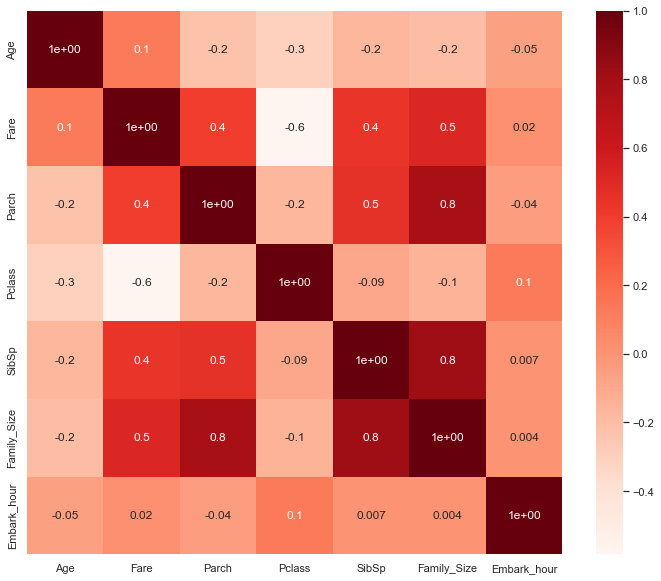

In [20]:
cor_heatmap(cor_spearman)

We can conclude that:
- We need to use other feature selection techniques to get more insights.
- There are two pairs of variables highly correlated, namely:
    - Parch vs Family_Size (0.8) <br>
    - SibSp vs Family_Size (0.8) <br>

We need to find some way as an untie mechanism - out of theses variables which one (if any at all, should be removed). One possible approach could be to use other techniques of feature selection to decide which variables should we keep. Another possible approach was to remove the Family_Size since it is correlated with both variables, but it may be possible that it has a higher influence on the target.

<a class="anchor" id="9th-bullet">

### 2.1.3. Chi-Square for categorical data

</a>

This time we are going to check the importance of the categorical independent variables in the target. For that, we are going to use the dataset `X_train_cat`.

__`Step 13`__ Create a function named as `TestIndependence` that should receive as arguments the dataset of independent variables, the target, the name of each independent variable and the alpha defined. This function will follow the steps of chi-square to check if a independent variable is an important predictor.

In [21]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

__`Step 14`__ For all the categorical variables available on `X_train_cat`, call the function `TestIndependence`.

In [22]:
for var in X_train_cat:
    TestIndependence(X_train_cat[var],y_train, var)

Cabin is IMPORTANT for Prediction
Embarked is IMPORTANT for Prediction
Last Name is NOT an important predictor. (Discard Last Name from model)
First Name is NOT an important predictor. (Discard First Name from model)
Sex is IMPORTANT for Prediction
Ticket is NOT an important predictor. (Discard Ticket from model)
Title is IMPORTANT for Prediction
Embarked_Flag is NOT an important predictor. (Discard Embarked_Flag from model)


According to chi-square, we should discard `Last Name`, `First Name`, `Ticket` and `Embark_Flag`. 

**Note**: There is another implementation of chi-square in sklearn that you can check [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html). However, this implementation requires the input variables to all be already in a non-negative numerical representation (i.e. they already need to be encoded - which is not the case of our dataset).

Moreover, for pipeline implementation purposes, it is often more convenient to wrap the chi-square test (or an ANOVA test for that matter) in a class such as [`SelectKBest`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) - which selects the top `k` features. Other useful classes for this exact same task are [`SelectFwe`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFwe.html) and [`SelectFdr`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFdr.html) - which select features based on a significance level.

<a class="anchor" id="10th-bullet">

### 2.1.4. Visually inspecting the weight of the dependent variable in categorical data (EXTRA)

</a>

In this step, we are going to create two plots to check the weight that the dependent variable has in the different labels of a categorical variable. <br><br>
The first plot will represent the frequency of each value of the dependent variable in the different categories, and the second plot will make this representation more intuitive by checking the proportion of the presence of each label of the depedent variable in each category. <br><br>
Sometimes it can be useful not only to use more advanced techniques like the ones we saw previously, but also to explore visually the variables that we have, like we are going to do in this step.

While in the example given you can visualize this relation only to categorical data, you can create your own function where numerical data is split into bins to have a similar visualization.


__`Step 15`__ Create a function where you can visualize the proportion of the presence of each label of the dependent variable in each possible value of a categorical feature. Check the "weight" of the variable `Sex`.

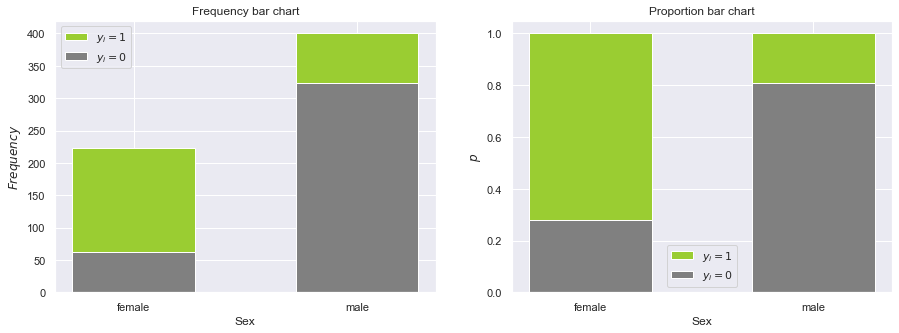

In [23]:
# first join all the training data
all_train = X_train.join(y_train)

def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()
    
bar_charts_categorical(all_train, "Sex", "Survived")

<a class="anchor" id="11th-bullet">

## 2.2. Wrapper Methods
    
</a>

While filter methods rely on using statistical properties of the data by themselves, wrapper methods **cheat at the task of identifying relevant variables** by creating multiple models and using their performance as a proxy for the relevance of the features. In essence, all wrapper methods involve the following steps:
1. Select a subset of features
2. Train a model using only these features
3. Evaluate the model's performance according to one pre-defined metric
4. Repeat steps 1-3 on different feature subsets
5. Select the feature subset that resulted in the best model performance

In essence, we use the performance of a predictive model as the proxy for feature relevance. Since we run models, we need an algorithm that we will call *base estimator*. **This based estimator is not one we actually want to use to make predictions, but rather a model that we will only use to take a sneaky peek at what features are more relevant**.

The main difference between different wrapper methods is the way the feature subsets are selected. However, in the literature you find that they generally fall in one of the following buckets:
- **Exhaustive Feature Selection**: tries all possible combinations of features and selects the one that results in the best model performance.
- **Forward Selection**: starts with no features and adds one feature at a time, selecting the feature that improves the model performance the most at each step.
- **Backward Elimination**: starts with all features and removes one feature at a time, removing the feature that decreases the model performance the least at each step.
- **Stepwise Selection**: a combination of forward selection and backward elimination, where features can be added or removed at each step based on their impact on model performance.
- **Recursive Feature Elimination (RFE)**: A special case of **Backward Selection** that starts with all features and recursively removes the least important feature based on the feature importance provided by the base estimator.

<a class="anchor" id="12th-bullet">

### 2.2.1. RFE
    
</a>

This time we are going to apply Recursive Feature Elimination (RFE) that essentially runs multiple iterations of a predictive model (each with each own set of features). Essencially, it runs first with all features and removes the feature considered to be the *least important* variable before running again (and the process is repeated a pre-specified number of features to keep is set). 

 For **RFE we can use as base estimator any predictive algorithm that has a way of determining feature importance**. In the case for this example, the base estimator we will use is a Logistic Regression, which uses *coefficients* as the way to determine the importance of different variables.

__`Step 16`__ Using LogisticRegression, create a Logistic Regression Classifier instance called `model`
- _Documentation sklearn.linear_model.LogisticRegression():_ https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [24]:
model = LogisticRegression()

__`Step 17`__ Using RFE, create a RFE instance called `rfe` and initialize by defining the following parameters:
- `estimator` = model
- `n_features_to_select` = 3 <br> <br>

- _Documentation sklearn.feature_selection.RFE():_ https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [25]:
# CODE HERE
rfe = RFE(estimator = model, n_features_to_select = 3)

__`Step 18`__ Transform the data using RFE by applying the method `fit_transform()` to the instance `rfe`, where `X` should be assigned to your independent variables and `y` to the dependent variable and assign it to the object `X_rfe`

In [26]:
# CODE HERE
X_rfe = rfe.fit_transform(X = X_train_num_scaled, y = y_train)

__`Step 20`__ Check the variables that were selected by RFE as the most "important" ones by calling the attribute `support_` to `rfe`.

In [27]:
# CODE HERE
X_train_num_scaled.columns

Index(['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Family_Size',
       'Embark_hour'],
      dtype='object')

In [28]:
# CODE HERE
rfe.support_

array([ True,  True, False,  True, False, False, False])

__`Step 21`__ Check the ranking of the variables defined by RFE as the most "important" ones by applying the attribute `ranking_` to `rfe`.

In [29]:
# CODE HERE
rfe.ranking_

array([1, 1, 5, 1, 3, 4, 2])

__Step 22:__ Create an object (pandas Series) named `selected_features` that will have as index the `X_train_num` columns names and the `support_` attribute as value. <br>
- _Documentation pandas.Series():_ https://pandas.pydata.org/docs/reference/api/pandas.Series.html

In [73]:
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

Age             True
Fare            True
Parch          False
Pclass          True
SibSp          False
Family_Size    False
Embark_hour    False
dtype: bool

If you don't know apriori the number of features to select you can create a loop to check the score of the estimator using a different number of features. <br>
Below you have an example that will check the score of the estimator by chosing between 1 and 7 variables.

In [74]:
#no of features
nof_list=np.arange(1,len(X_train_num_scaled.columns)+1)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on validation data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 3
Score with 3 features: 0.697761


According to RFE using Logistic Regression, the best number of numerical features to use for this data is **3** and we know, from before, that the numerical variables that we should keep for the final model are `Age`, `Fare` and `PClass`.

Run the cell below to plot how training accuracy and validation accuracy vary with the number of features.

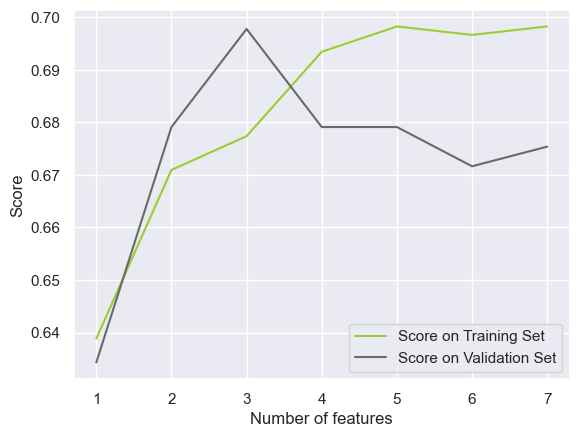

In [75]:
plt.plot(list(range(1,8)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,8)), val_score_list, label="Score on Validation Set", color='dimgray')
plt.xlabel("Number of features")
plt.ylabel("Score")
plt.legend()
plt.show()

**Now, try to perform RFE with a different classifier** and see if there are differences in the variables that are selected.

For that, we are going to use the function **RFE** with a base estimator being a **Support Vector Classifier**. What is the optimal number of features and how can we know what they are?

In [76]:
#no of features
nof_list=np.arange(1,len(X_train_num_scaled.columns)+1)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    #call support vector machines classifier
    model = SVC(kernel = 'linear')
    
    #create RFE instance
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    
    #fit and transform for training data, transform for val data
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on validation data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score > high_score):
        high_score = val_score
        nof = nof_list[n]
        
        #adding mention of variables to keep
        features_to_select = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print(f"Features to select: \n{features_to_select}")

Optimum number of features: 5
Score with 5 features: 0.671642
Features to select: 
Age             True
Fare            True
Parch          False
Pclass          True
SibSp           True
Family_Size    False
Embark_hour     True
dtype: bool


According to RFE with a Support Vector Machines, the most important variables are `Age`, `Fare`, `Pclass`, `SibSp` and `Embark_hour`.

You can also plot the results. 

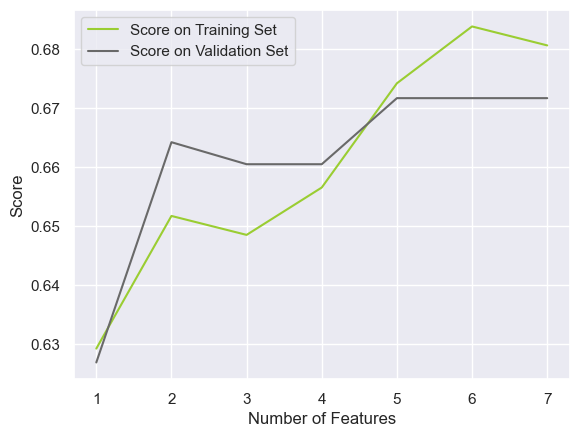

In [77]:
plt.plot(list(range(1,8)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,8)), val_score_list, label="Score on Validation Set", color='dimgray')
plt.xlabel("Number of Features")
plt.ylabel("Score")
plt.legend()
plt.show()

**Note:** Sklearn also features another implementation of **RFE** which is meant to automatically identify the best number of features [**RFECV**](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html). However, you should exercise some caution when using it due to the fact that uses Cross-Validation - an alternative way of splitting between training and validation data that is, theoretically more robust, but much more challenging to implement correctly without running into data leakage problems.

Moreover, for pipeline implementation purposes, you have other classes that implement similar ideas such as [`SequentialFeatureSelector`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html) - which allows you to do both forward and backward selection.

<a class="anchor" id="13th-bullet">

## 2.3. Embedded Methods
    
</a>

Embedded methods are also techniques that use a machine learning algorithm to perform feature selection. However, unlike wrapper methods, which use the model's performance as a proxy for feature relevance, embedded methods perform feature selection as part of the model training process itself. This means that the feature selection is integrated into the model and is not a separate step. 

Unlike wrapper methods, technically speaking, the model that is used for feature selection could be a model that we could use for prediction. In practice, however, this is often not the case - we use embedded methods more as a way to identify the features that were considered relevant (i.e. have an higher importance) by the model, and then use the information for the model training stage on more algorithms. All embedded methods have the following steps in common:
1. Train a model using all features
2. Extract feature importance from the model
3. Select features based on their importance
4. (Optional) Retrain the model using only the selected features

The main difference between different embedded methods is the way the feature importance is calculated. However, in the literature you find that they generally fall in one of the following buckets:

- **Regularization methods**: These methods add a penalty term to the model's loss function that discourages the model from using too many features. Examples include Lasso (L1 regularization - which mmakes the weights of unimportant variables actually reach 0) and Ridge (L2 regularization - whose weights assymptotically tend to 0 - but do not reach it).

- **Tree-based methods**: These methods use decision trees to calculate feature importance based on how much each feature contributes to reducing the impurity of the tree. Examples include Random Forest and Gradient Boosting.

<a class="anchor" id="14th-bullet">

### 2.3.1. Lasso Regression
    
</a>

__Step 23:__ Create a function to plot the importance of the features named `plot_importance()` that should receive as parameters the "importance" of each variable (`coef`) and a `name` to define the title.  Define the following conditions/steps in the function:
- sort the values of `coef` asn assign it to the object `imp_coef`
- the size of the figure should be (8,10)
- create a matplotlib plot `kind = barh` to plot the `imp_coef`.
- Define the title as "Feature importance using" + _the name of the model_ `name` + " Model"

In [78]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

__Step 24:__ Using LassoCV, create a Lasso Regression instance called `reg`
- _Documentation sklearn.feature_selection.LassoCV():_ https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

In [79]:
# CODE HERE
reg = LassoCV()

__Step 25:__ Fit the data to `reg` by using the method `fit()` where `X` should be assigned to `data` and `y` to the dependent variable.

In [80]:
# CODE HERE
reg.fit(X_train_num_scaled, y_train)

LassoCV()

__Step 26:__ Create an object (pandas Series) named `coef` that will have as index the `data` columns names and the `coef_` attribute as value.

In [81]:
# CODE HERE
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
coef

Age           -0.532898
Fare           0.736138
Parch         -0.257195
Pclass        -0.789676
SibSp         -0.742005
Family_Size    0.573198
Embark_hour    0.254992
dtype: float64

__Step 27:__ Check how many variables did Lasso picked (if the coef is different from 0) and how many variables did Lasso eliminated (if the coef is equal to 0).

In [82]:
# CODE HERE
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 7 variables and eliminated the other 0 variables


__Step 28:__ Sort the values of `coef` using the method `sort_values()`.

In [83]:
# CODE HERE
coef.sort_values()

Pclass        -0.789676
SibSp         -0.742005
Age           -0.532898
Parch         -0.257195
Embark_hour    0.254992
Family_Size    0.573198
Fare           0.736138
dtype: float64

__Step 29:__ By calling the function `plot_importance()` that we created on step 15, plot the feature importance of the variables, by passing as parameters the object `coef` and the name `"Lasso"`

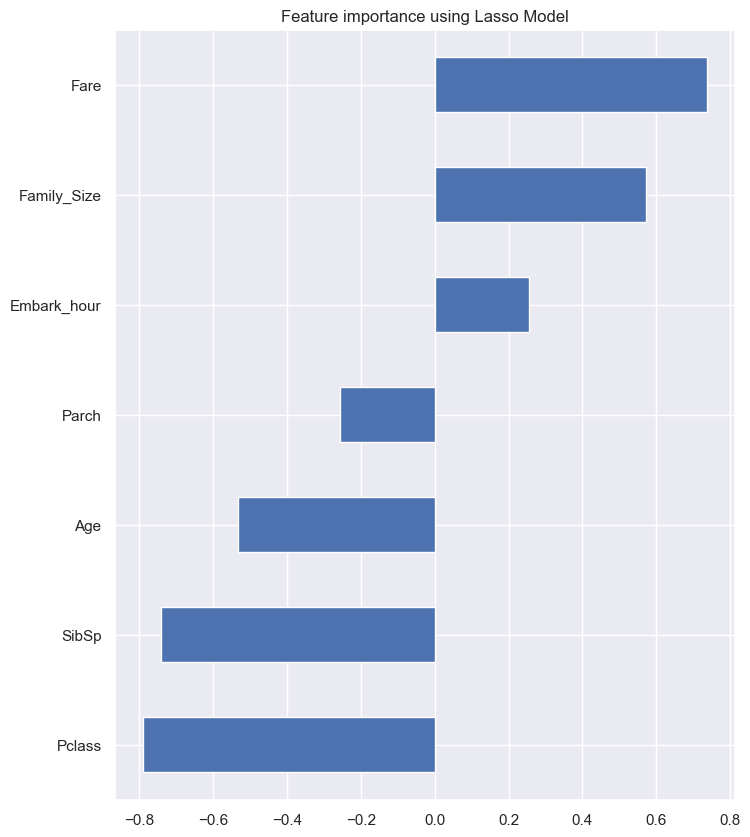

In [84]:
# CODE HERE
plot_importance(coef,'Lasso')

According to Lasso, we should not remove any variable as no variable seems insignificant (`coefficient == 0`). `Parch` and `Embark_hour` seem less important than their remaining predictors, but still contribute. 

<a class="anchor" id="15th-bullet">

## Final Insights:
    
</a>

<hr>

### Numerical Data

| Predictor | Spearman | RFE LR| RFE SVM | Lasso | What to do? (One possible way to "solve") | 
| --- | --- | --- | --- |--- |---|
| Age | Keep | Keep | Keep |Keep | Include in the model |
| Fare | Keep | Keep | Keep |Keep| Include in the model |
| Parch | Keep?| Discard | Discard |Keep ?| Discard |
| PClass | Keep | Keep | Keep | Keep | Include in the model |
| SibSp | Keep? | Discard | Keep | Keep | Keep |
| Family_Size | Keep? | Discard | Discard | Keep | Discard |
| Embark_Hour | Keep |Discard |Keep | Keep? |  Try with and without |

<hr>


### Categorical Data

| Predictor | Chi-Square | 
| --- | --- | 
| Cabin | Keep |  
| Embarked | Keep | 
| First Name| Discard|
| Last Name| Discard|
| Sex | Keep | 
| Ticket | Discard | 
| Title | Keep |
| Embarked Flag | Discard | 

<hr>

